# Проектная работа по модулю “Эксплоративный анализ и предобработка данных”

<pre>
ФИО: Никифоров Владимир
</pre>

Проектная работа по модулю “Препроцессинг данных”

1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. 
Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). 
Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [1]:
'''Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)'''

'Data Set Information:\n\nFeatures are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] \n\nSeparating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. \n\nThe actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. \n\nThis database 

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import dateutil.relativedelta

import scipy.stats as sts
import scipy.stats.mstats as mstats
from scipy.stats import pearsonr

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

import os
import urllib
import shutil

def download_file(url, dir_path="../data"):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        
    file_name = os.path.split(url)[-1]
    file_path = os.path.join(dir_path, file_name)
    
    with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
        
    return file_path

/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
C_RANDOM_STATE = 7

In [4]:
import sklearn
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
download_file("https://github.com/netology-code/data-scientist4/raw/master/3.%20Python%20Preprocessing/Python%20Preprocessing%20-%20Project%20Work/data_breast.csv")
raw_df = pd.read_csv('../data/data_breast.csv')
print(f'Shape of dataset: {raw_df.shape}')
raw_df.head()

Shape of dataset: (569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
raw_df[list(raw_df.columns[raw_df.isnull().sum()>0])].isnull().sum()

Unnamed: 32    569
dtype: int64

Пропущенных значений нет.

In [7]:
# Переделаем сразу искомую переменную в бинарный признак
raw_df['diagnosis'] = raw_df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [9]:
# Основная статистика
raw_df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930 

Пустых значений в датасете, кроме абсолютно пустого столбца Unnamed: 32 - нет.

In [10]:
raw_df = raw_df.iloc[:,:32]
raw_df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [11]:
# смысла в столбце id нет - обучаться на нем нельзя - сразу удалим
df = raw_df.drop(['id'], axis=1, inplace=False)

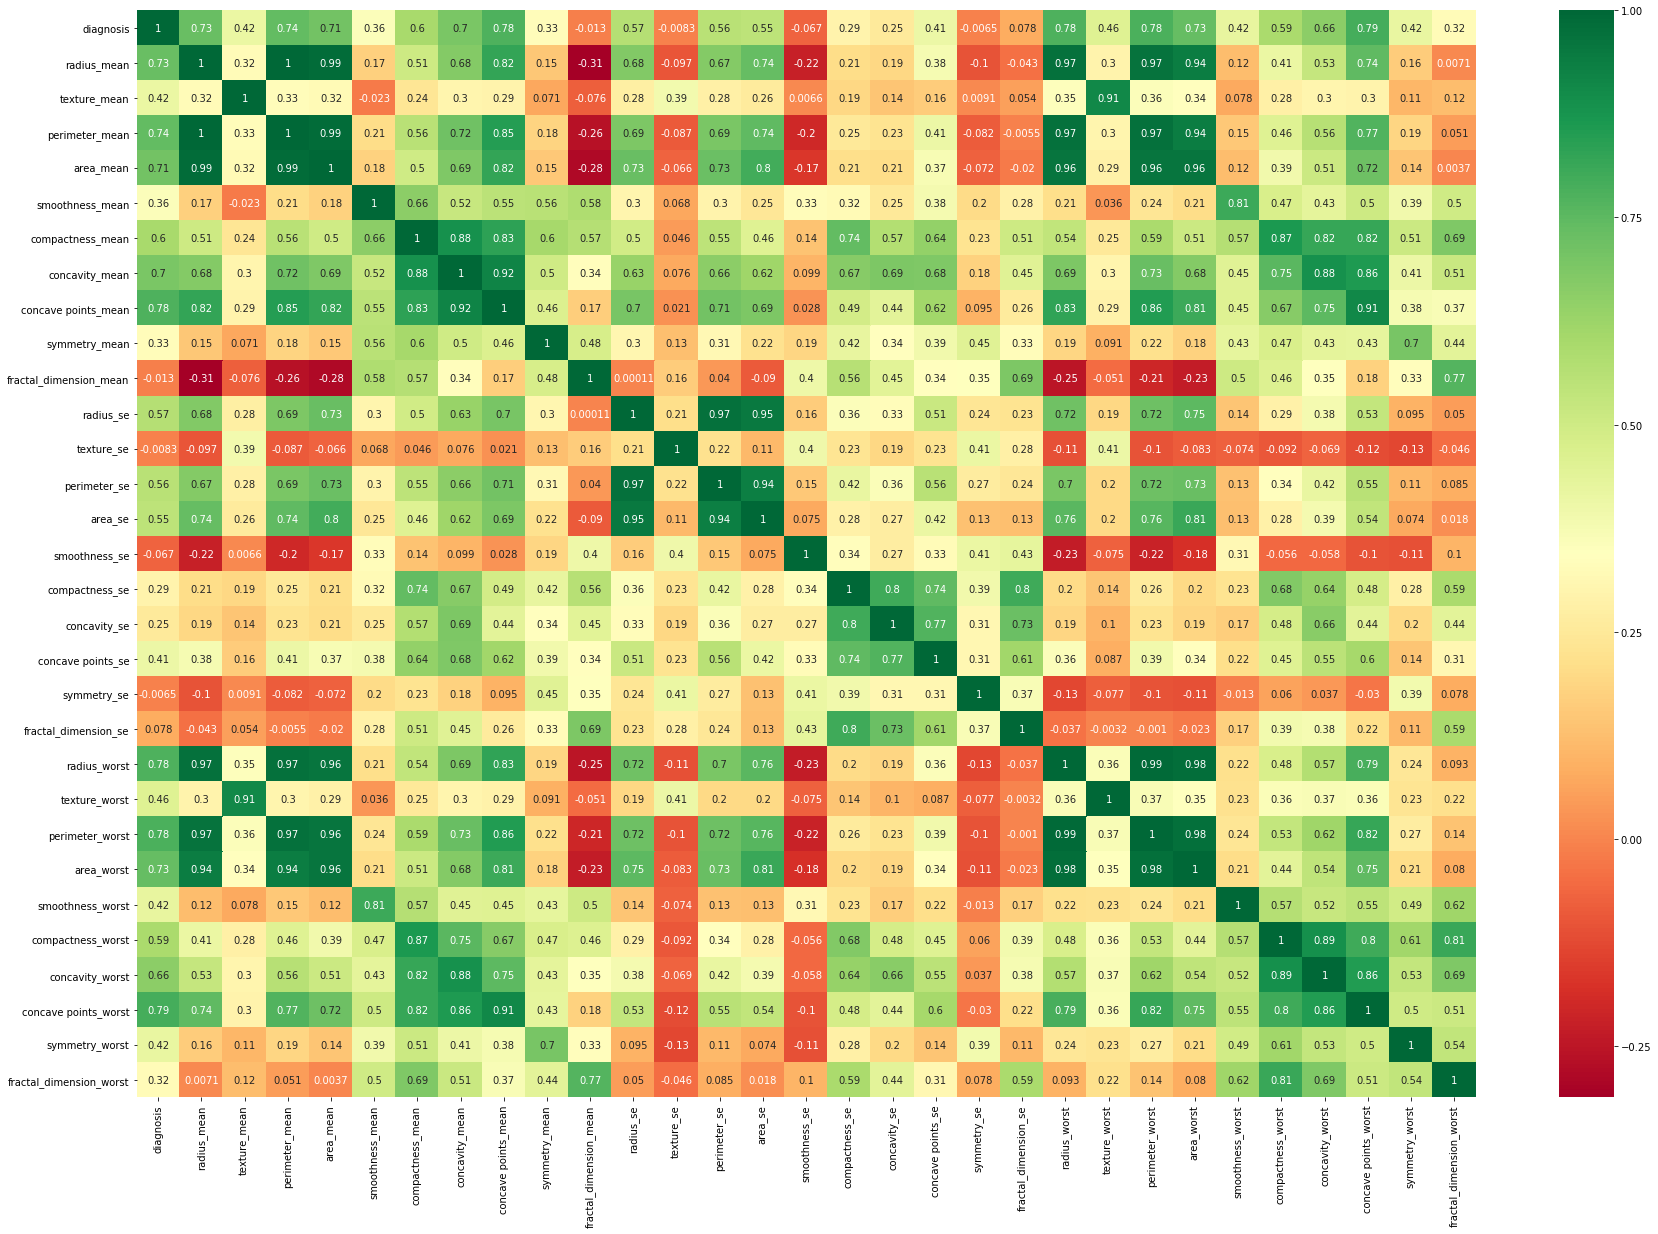

In [12]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

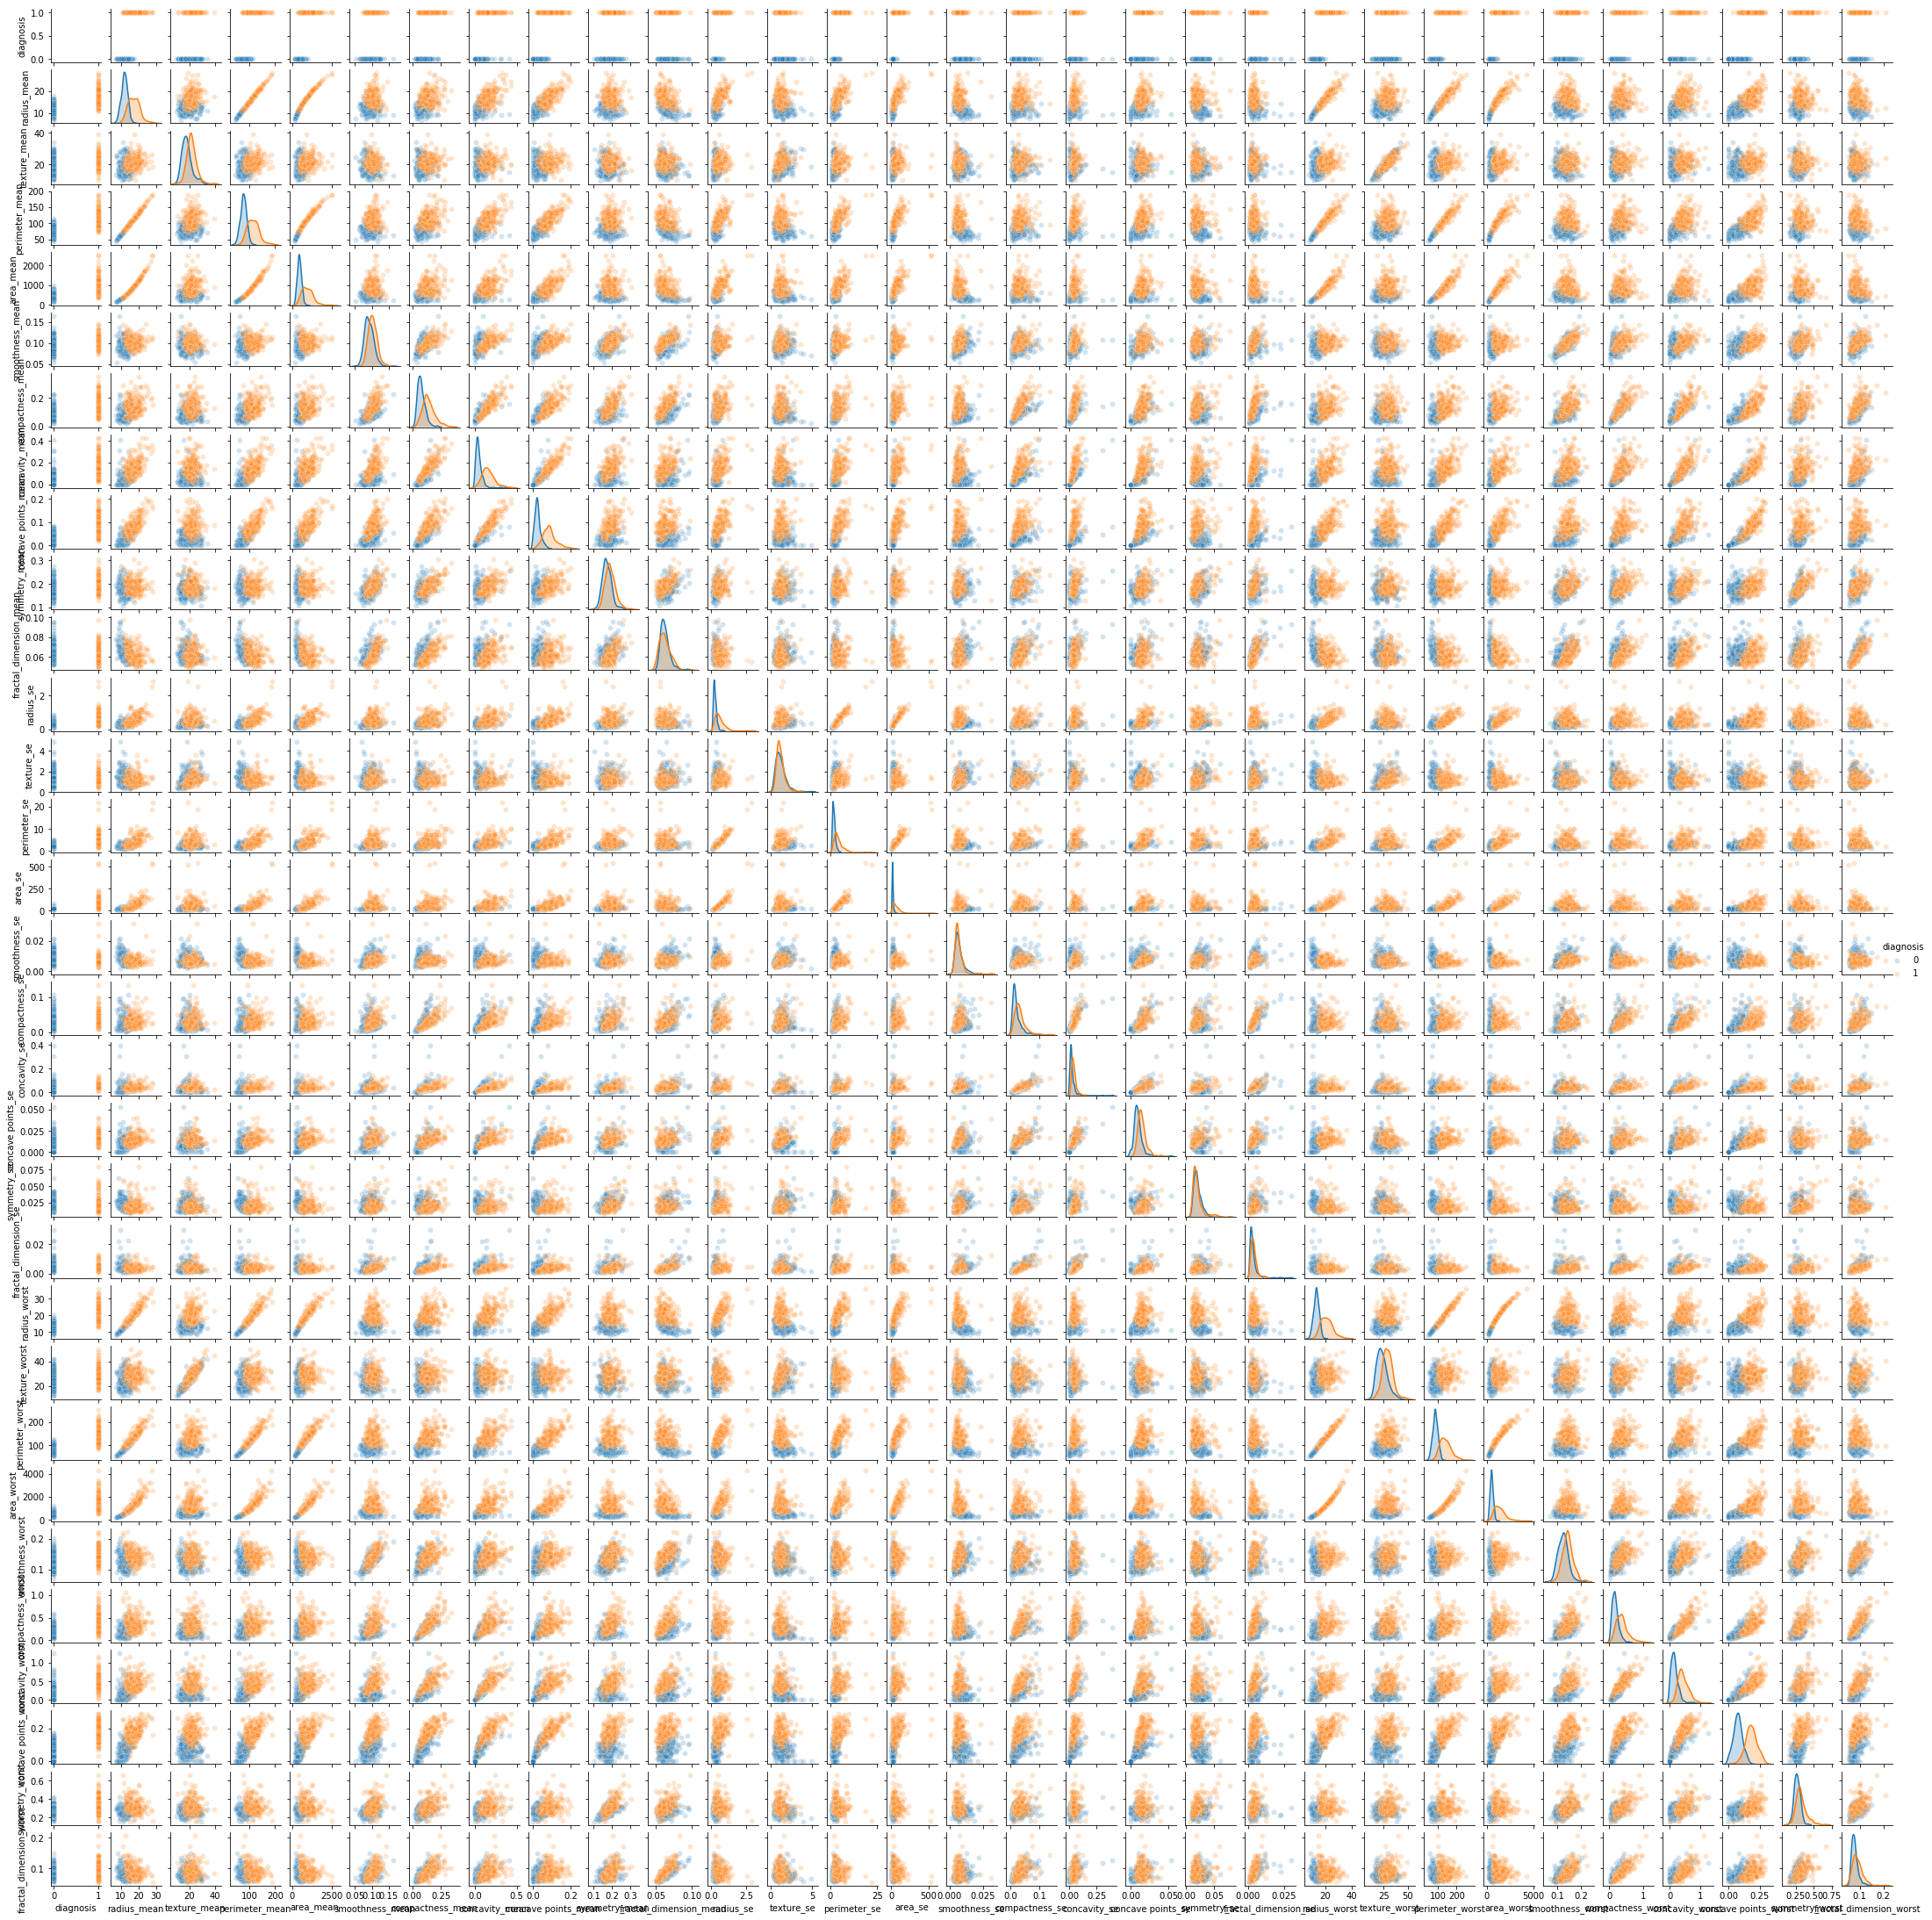

In [13]:
g=sns.pairplot(data=df,plot_kws={'alpha':0.2},hue='diagnosis');
g.fig.set_size_inches(30,30)

Из pairplot видно много выразительных фичей в плане разделения искомого признака - по различающимся распределениям в разрезе искомого признака и линейно-разделимых распределений фичей на скопления разных уровней категориальной переменной искомого признака.

In [14]:
# Для примера возьмем пару фичей с явно различающимися распределениями в разрезе категорийальной фичи, а также неразличимыми распределениями.
# Отнормируем числовые переменные датасета с сильной корреляцией
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(df[['concave points_worst','symmetry_se']])
df_norm = pd.concat([pd.DataFrame(np_scaled, columns=['concave points_worst','symmetry_se']),df[['diagnosis']]], axis = 1)
df_bad = df_norm[df_norm['diagnosis']==1]
df_not_bad = df_norm[df_norm['diagnosis']==0]

#### Проверим гипотезу о различии среднего количества вогнутых участков контура между злокачественными и доброкачественными опухолями

In [15]:
sts.ttest_ind(df_bad['concave points_worst'], df_not_bad['concave points_worst'])

Ttest_indResult(statistic=31.054555115984236, pvalue=1.9690997072164375e-124)

p-value меньше уровня значимости, а это означает, что мы можем отвергнуть нулевую гипотезу об одинаковых средних, а значит средний уровень количества вогнутых участков контура между злокачественными и доброкачественными опухолями отличается.

Проверим гипотезу о различии среднего значения симметричности между злокачественными и доброкачественными опухолями:

In [16]:
sts.ttest_ind(df_bad['symmetry_se'], df_not_bad['symmetry_se'])

Ttest_indResult(statistic=-0.15529780000593163, pvalue=0.8766418183858853)

p-value больше уровня значимости, а это означает, что мы не можем отвергнуть нулевую гипотезу об одинаковых средних, а значит средние значения симметричности между злокачественными и доброкачественными опухолями статистически не отличаются.

Далее по списку:

* Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?
* Рассчитать Feature Selection для выбранных переменных.
* Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести в ероятность каждого класса.
* Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [17]:
X, y = df.drop(['diagnosis'], axis=1,inplace=False), df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [18]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((426, 30), (143, 30), 426, 143)

### Линейная регрессия:

In [19]:
lm = LogisticRegression().fit(X_train,y_train)
y_train_predict = lm.predict(X_train)
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

y_test_predict = lm.predict(X_test)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

Train:  0.94
Test:  0.94
accuracy: 0.951048951048951
f1: 0.9468937344156189
precision: 0.9531182795698925
recall: 0.9417190775681341


### Случайный лес:

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE).fit(X_train, y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

Train:  1.0
Test:  0.99
accuracy: 0.951048951048951
f1: 0.9464276157345464
precision: 0.9580043859649123
recall: 0.9378406708595388


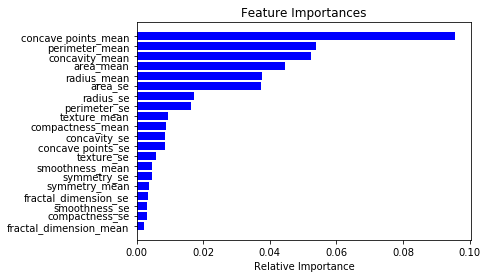

In [21]:
features = X_train.columns
importances = clf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Случайный лес явно лидирует в данном зачете!

## Посмотрим, что мы можем улучшить с помощью понижения размерности:

In [22]:
print(f'Текущая размерность датасета: {X_train.shape}')

Текущая размерность датасета: (426, 30)


In [23]:
# Возьмем для начала сжатие до 10 компонент
n=10
pca = PCA(n_components=n)
pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)

Теперь натравим на этот датасет случайный лес (как наилучший алгоритм на тесте):

In [24]:
X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE).fit(X_train, y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

Train:  1.0
Test:  0.99
accuracy: 0.9440559440559441
f1: 0.9409090909090909
precision: 0.9357405140758874
recall: 0.9477987421383648


Лучше не стало. Может 10 компонент - не самое оптимальное количество? Посмотрим на все возможные комбинации и результаты на тесте:

In [26]:
l_result = []
for n in range(1,df.shape[1]-1):
    pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
    pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
    df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
    df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)
    
    X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
    y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
    y_test_predict = clf.predict(X_test)
    l_result.append((n,np.round(roc_auc_score(y_test, y_test_predict_proba), 2),accuracy_score(y_test, y_test_predict),f1_score(y_test, y_test_predict, average="macro")))

In [27]:
# отсортируем по наивысшему ROC_AUC на тесте и F-мере
l_result.sort(key=lambda x:x[1]*10+x[3],reverse=True)
l_result

[(6, 0.99, 0.972027972027972, 0.9702455264253016),
 (8, 0.99, 0.972027972027972, 0.9697802197802198),
 (17, 0.99, 0.965034965034965, 0.9626690335717641),
 (26, 0.99, 0.965034965034965, 0.9626690335717641),
 (9, 0.99, 0.965034965034965, 0.9623783214943435),
 (12, 0.99, 0.965034965034965, 0.9623783214943435),
 (21, 0.99, 0.958041958041958, 0.9550314465408805),
 (28, 0.99, 0.958041958041958, 0.9550314465408805),
 (11, 0.99, 0.951048951048951, 0.9481158969574457),
 (13, 0.99, 0.951048951048951, 0.947329650092081),
 (18, 0.99, 0.951048951048951, 0.9464276157345464),
 (19, 0.99, 0.951048951048951, 0.9464276157345464),
 (24, 0.99, 0.9440559440559441, 0.9400419287211741),
 (23, 0.99, 0.9300699300699301, 0.9261363636363635),
 (20, 0.98, 0.9790209790209791, 0.9776014201430585),
 (22, 0.98, 0.951048951048951, 0.9468937344156189),
 (4, 0.98, 0.9440559440559441, 0.9409090909090909),
 (27, 0.98, 0.9440559440559441, 0.9404910528506034),
 (7, 0.98, 0.9440559440559441, 0.9400419287211741),
 (16, 0.98, 

In [28]:
print(f'Лучшее количество компонент: {l_result[0][0]}')

Лучшее количество компонент: 6


In [29]:
n=l_result[0][0]
pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)

X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [30]:
print(f'Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из {n} компонент(ы):')

Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из 6 компонент(ы):


In [31]:
parameters = {
    'n_estimators'      : [50,100,200,300,500],
    'max_depth'         : [10, 15, 20, 25, 30],
    'min_samples_split' : [2,10,100]
}

gscv = GridSearchCV(RandomForestClassifier(random_state=C_RANDOM_STATE), parameters, cv=10, n_jobs=-1)
gscv.fit(X_train, y_train)

print(gscv.score(X_test, y_test))
print(gscv.best_params_)

0.9370629370629371
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


Test ROC_AUC:  0.98
Test accuracy: 0.9370629370629371
Test f1: 0.933291867516716
Test precision: 0.9291871921182266
Test recall: 0.9383647798742139


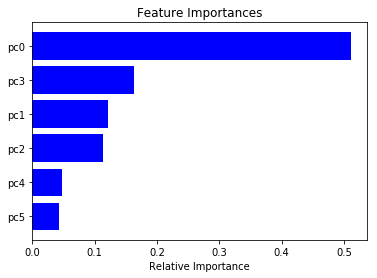

In [32]:
cv_best_params = gscv.best_params_
clf = RandomForestClassifier(n_estimators=cv_best_params['n_estimators'],max_depth=cv_best_params['max_depth'],min_samples_split=cv_best_params['min_samples_split'],
                             random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
# clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test ROC_AUC: ", roc_auc_test)
y_test_predict = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'Test f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'Test precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'Test recall: {recall_score(y_test, y_test_predict, average="macro")}')

features = X_train.columns
importances = clf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Как обычно, подобранные гиперпараметры на тренировочном наборе не дали прироста результата на тестовом относительно выбранных параметров по-умолчанию (за исключением количества деревьев в лесу).

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=C_RANDOM_STATE).fit(X_train, y_train)
print(clf)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)
Train:  1.0
Test:  0.98
accuracy: 0.9370629370629371
f1: 0.933291867516716
precision: 0.9291871921182266
recall: 0.9383647798742139


### Попробуем воспользоваться валидационным набором, чтобы сразу же тестировать на малом куске данных модели с гиперпараметрами:

In [34]:
# Возьмем для начала сжатие до 10 компонент
n=10
pca = PCA(n_components=n)
pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)

Теперь натравим на этот датасет случайный лес (как наилучший алгоритм на тесте):

In [35]:
X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [36]:
random_grid = {'n_estimators': [100]}
clf = RandomForestClassifier(random_state=C_RANDOM_STATE)
clf = RandomizedSearchCV(estimator = clf, n_iter = 1, cv = 10, param_distributions=random_grid , verbose=2, random_state=C_RANDOM_STATE, n_jobs = -1).fit(X_train, y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'recall: {recall_score(y_test, y_test_predict, average="macro")}')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Train:  1.0
Test:  0.99
accuracy: 0.958041958041958
f1: 0.9553682896379526
precision: 0.9522727272727273
recall: 0.958909853249476


Кардинально лучше! Посмотрим на все возможные комбинации и результаты на тесте:

In [37]:
random_grid = {'n_estimators': [100]}
l_result = []
for n in range(1,df.shape[1]-1):
    pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
    pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
    df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
    df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)
    
    X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
    
    clf = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=C_RANDOM_STATE), n_iter = 1, cv = 10, param_distributions=random_grid , verbose=2, random_state=C_RANDOM_STATE, n_jobs = -1).fit(X_train, y_train)
    y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
    y_test_predict = clf.predict(X_test)
    l_result.append((n,np.round(roc_auc_score(y_test, y_test_predict_proba), 2),accuracy_score(y_test, y_test_predict),f1_score(y_test, y_test_predict, average="macro")))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s


[CV] ................................. n_estimators=100, total=   0.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s


[CV] ................................. n_estimators=100, total=   0.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s


[CV] ................................. n_estimators=100, total=   0.2s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] ................................. n_estimators=100, total=   0.4s
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.4s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s


[CV] ................................. n_estimators=100, total=   0.2s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [38]:
# отсортируем по наивысшему ROC_AUC на тесте и F-мере
l_result.sort(key=lambda x:x[1]*10+x[3],reverse=True)
l_result

[(19, 1.0, 0.965034965034965, 0.9623783214943435),
 (13, 1.0, 0.958041958041958, 0.9556818181818181),
 (3, 0.99, 0.972027972027972, 0.970020964360587),
 (11, 0.99, 0.965034965034965, 0.9626690335717641),
 (22, 0.99, 0.965034965034965, 0.9626690335717641),
 (16, 0.99, 0.965034965034965, 0.9623783214943435),
 (26, 0.99, 0.965034965034965, 0.9623783214943435),
 (8, 0.99, 0.965034965034965, 0.9620669531540135),
 (12, 0.99, 0.958041958041958, 0.9546703296703296),
 (9, 0.99, 0.951048951048951, 0.947329650092081),
 (21, 0.99, 0.951048951048951, 0.9468937344156189),
 (20, 0.99, 0.951048951048951, 0.9464276157345464),
 (23, 0.99, 0.9440559440559441, 0.9400419287211741),
 (14, 0.99, 0.9440559440559441, 0.9395604395604396),
 (28, 0.99, 0.9440559440559441, 0.9395604395604396),
 (25, 0.99, 0.9370629370629371, 0.933291867516716),
 (15, 0.99, 0.9370629370629371, 0.9322809786898185),
 (6, 0.99, 0.9300699300699301, 0.9261363636363635),
 (10, 0.99, 0.9300699300699301, 0.9250524109014675),
 (7, 0.99, 0.9

In [39]:
print(f'Лучшее количество компонент: {l_result[0][0]}')

Лучшее количество компонент: 19


In [40]:
n=l_result[0][0]
pca = PCA(n_components=n, random_state=C_RANDOM_STATE)
pc = pca.fit_transform(df.drop(['diagnosis'], axis=1,inplace=False))
df_pc = pd.DataFrame(data = pc, columns = ['pc'+str(i) for i in range(n)])
df_with_pc = pd.concat([df_pc, df[['diagnosis']]], axis = 1)

X, y = df_with_pc.drop(['diagnosis'], axis=1,inplace=False), df_with_pc['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [41]:
print(f'Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из {n} компонент(ы):')

Найдем наилучшие гиперпараметры для случайного леса для тренировочного набора для полученного датасета из 19 компонент(ы):


In [42]:
parameters = {
    'n_estimators'      : [50,100,200,300,500],
    'max_depth'         : [10, 15, 20, 25, 30],
    'min_samples_split' : [2,10,100]
}

gscv = GridSearchCV(RandomForestClassifier(random_state=C_RANDOM_STATE), parameters, cv=10, n_jobs=-1)
gscv.fit(X_train, y_train)

print(gscv.score(X_test, y_test))
print(gscv.best_params_)

0.916083916083916
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


Test ROC_AUC:  0.97
Test accuracy: 0.916083916083916
Test f1: 0.9107365792759052
Test precision: 0.9079545454545455
Test recall: 0.9139412997903564


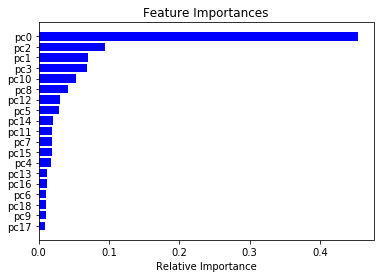

In [43]:
cv_best_params = gscv.best_params_
clf = RandomForestClassifier(n_estimators=cv_best_params['n_estimators'],max_depth=cv_best_params['max_depth'],min_samples_split=cv_best_params['min_samples_split'],
                             random_state=C_RANDOM_STATE, n_jobs=-1).fit(X_train, y_train)
y_test_predict = clf.predict_proba(X_test)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test ROC_AUC: ", roc_auc_test)
y_test_predict = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_test_predict)}')
print(f'Test f1: {f1_score(y_test, y_test_predict, average="macro")}')
print(f'Test precision: {precision_score(y_test, y_test_predict, average="macro")}')
print(f'Test recall: {recall_score(y_test, y_test_predict, average="macro")}')

features = X_train.columns
importances = clf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Таким образом, наилучшее качество классификации получено методом снижения размерности методом главных компонент, с гиперпараметрами, подобранными с кросс-валидацией на тренировочном наборе данных.